<a href="https://colab.research.google.com/github/Mkas07/flaskapipredictmodel/blob/main/xgbmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Karachi20182023data.csv')
df.head()

,Unnamed: 0,property_id,location,price,baths,bedrooms,year,AreaSqYards
0,0,0,Bahria Town Karachi,4200000,1,1,2023,60.0
1,1,1,Bahria Town Karachi,5900000,2,2,2023,161.0
2,2,2,Bahria Town Karachi,42000000,5,5,2023,500.0
3,3,5,Bahria Town Karachi,46500000,5,5,2023,500.0
4,4,6,Bahria Town Karachi,35000000,6,5,2023,272.0


In [ ]:
# Remove rows with any null values
df.dropna(inplace=True)
print('Null values removed.')

# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]
print('Filtered data for the year 2023.')

# Remove outliers based on price
df_2023 = df_2023[df_2023['price'] < df_2023['price'].quantile(0.95)]
print('Outliers removed based on price.')
df_2023 = df_2023.drop(columns=['Unnamed: 0', 'property_id', 'year'])

# One-hot encode the location column
df_2023_encoded = pd.get_dummies(df_2023, columns=['location'])
print('One-hot encoding completed.')
print(df_2023_encoded.head())

Null values removed.
Filtered data for the year 2023.
Outliers removed based on price.
One-hot encoding completed.
      price  baths  bedrooms  AreaSqYards  location_Bahria Town Karachi  \
0   4200000      1         1         60.0                          True   
1   5900000      2         2        161.0                          True   
2  42000000      5         5        500.0                          True   
3  46500000      5         5        500.0                          True   
4  35000000      6         5        272.0                          True   

   location_Cantt  location_Clifton  location_DHA Defence  \
0           False             False                 False   
1           False             False                 False   
2           False             False                 False   
3           False             False                 False   
4           False             False                 False   

   location_Federal B Area  location_Gulistan-e-Jauhar  \
0        

In [ ]:
df_2023_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8322 entries, 0 to 8792
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          8322 non-null   int64  
 1   baths                          8322 non-null   int64  
 2   bedrooms                       8322 non-null   int64  
 3   AreaSqYards                    8322 non-null   float64
 4   location_Bahria Town Karachi   8322 non-null   bool   
 5   location_Cantt                 8322 non-null   bool   
 6   location_Clifton               8322 non-null   bool   
 7   location_DHA Defence           8322 non-null   bool   
 8   location_Federal B Area        8322 non-null   bool   
 9   location_Gulistan-e-Jauhar     8322 non-null   bool   
 10  location_Gulshan-e-Iqbal Town  8322 non-null   bool   
 11  location_Korangi               8322 non-null   bool   
 12  location_Malir                 8322 non-null   bool  

In [ ]:
df_2023.head(15)

,location,price,baths,bedrooms,AreaSqYards
0,Bahria Town Karachi,4200000,1,1,60.0
1,Bahria Town Karachi,5900000,2,2,161.0
2,Bahria Town Karachi,42000000,5,5,500.0
3,Bahria Town Karachi,46500000,5,5,500.0
4,Bahria Town Karachi,35000000,6,5,272.0
5,Nazimabad,18000000,3,3,150.0
6,Bahria Town Karachi,15000000,3,3,235.0
7,Bahria Town Karachi,6000000,2,2,122.0
8,Bahria Town Karachi,14000000,3,3,235.0
9,Bahria Town Karachi,13500000,3,3,125.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_2023_encoded.drop(columns=['price'])
y = df_2023_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 4333876.992342923
Mean Squared Error (MSE): 55873470706407.484
R-squared (R2 Score): 0.9254991498880637


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# Example input data (replace with actual values)
new_data = {
    'baths': 3,
    'bedrooms': 3,
    'AreaSqYards': 156,
    'location_Bahria Town Karachi': 0,
    'location_Cantt': 0,
    'location_Clifton': 0,
    'location_DHA Defence': 0,
    'location_Federal B Area': 0,
    'location_Gulistan-e-Jauhar': 1,
    'location_Gulshan-e-Iqbal Town': 0,
    'location_Korangi': 0,
    'location_Malir': 0,
    'location_Nazimabad': 0,
    'location_North Karachi': 0,
    'location_Shah Faisal Town': 0,
    'location_Tariq Road': 0,
    'location_University Road': 0
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([new_data])

# Predict the price using the trained model
predicted_price = model.predict(input_df)

# Display the predicted price
print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 15260838.29689599


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
score_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(score_lr)
print(mse_lr)

0.8364561641316476
122653120184193.42


In [ ]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
score_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(score_tree)
print(mse_tree)

0.9013379186574157
73993691393393.39


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(score_xgb)
print(mse_xgb)

0.9281878629745355
53857014093507.086


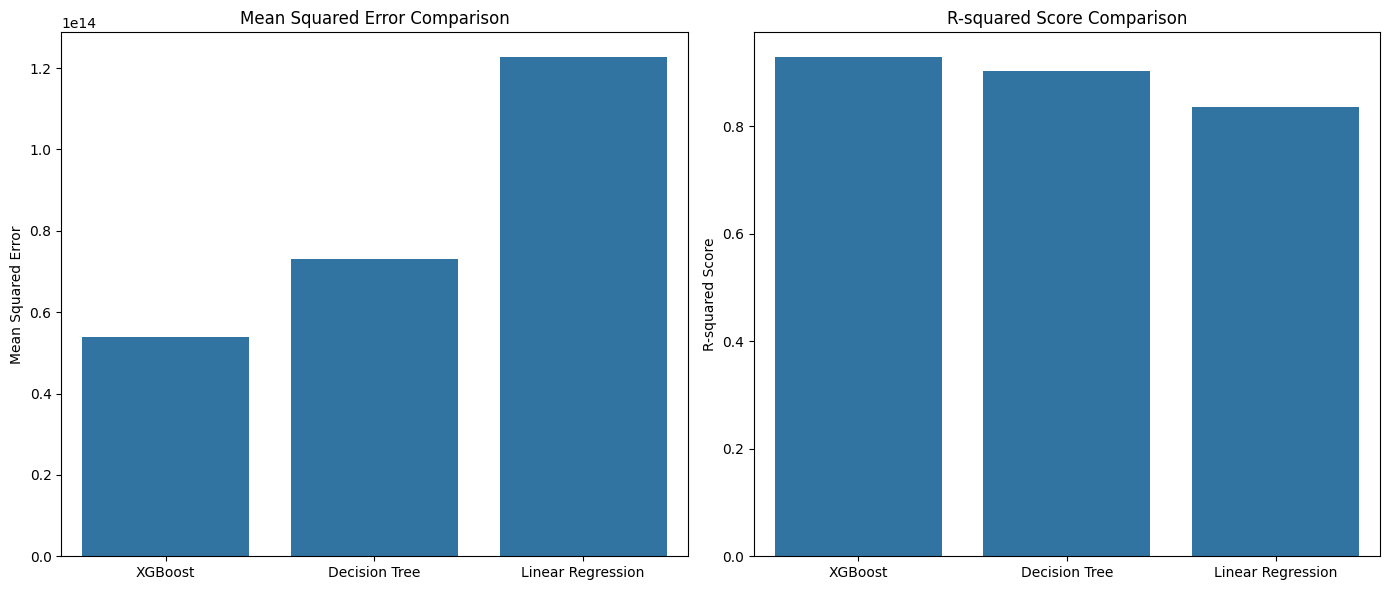

In [ ]:
# Visualization
models = ['XGBoost', 'Decision Tree', 'Linear Regression']
mse_scores = [mse_xgb, mse_tree, mse_lr]
r2_scores = [score_xgb, score_tree, score_lr]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=models, y=mse_scores, ax=ax[0])
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('Mean Squared Error')
sns.barplot(x=models, y=r2_scores, ax=ax[1])
ax[1].set_title('R-squared Score Comparison')
ax[1].set_ylabel('R-squared Score')
plt.tight_layout()
plt.show()

In [ ]:
# Define the input data for prediction
input_data = {'baths': [3], 'bedrooms': [3], 'AreaSqYards': [156], 'location_Gulistan-e-Jauhar': [1]}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Ensure all location columns are present in the input data
for col in X.columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Reorder columns to match the training data
input_df = input_df[X.columns]

In [ ]:
# Make predictions using the trained models
lr_pred = lr_model.predict(input_df)
dt_pred = tree_model.predict(input_df)
xgb_pred = xgb_model.predict(input_df)

# Print the predictions
print('Linear Regression Prediction:', lr_pred[0])
print('Decision Tree Prediction:', dt_pred[0])
print('XGBoost Prediction:', xgb_pred[0])

Linear Regression Prediction: 18074581.009291776
Decision Tree Prediction: 11000000.0
XGBoost Prediction: 12509262.0


In [ ]:
# prompt: save my decision tree model in .h5 file

import joblib

# Save the Decision Tree model
joblib.dump(tree_model, 'decision_tree_model.h5')


['decision_tree_model.h5']

In [ ]:
df.head(15)

,Unnamed: 0,property_id,location,price,baths,bedrooms,year,AreaSqYards
0,0,0,Bahria Town Karachi,4200000,1,1,2023,60.0
1,1,1,Bahria Town Karachi,5900000,2,2,2023,161.0
2,2,2,Bahria Town Karachi,42000000,5,5,2023,500.0
3,3,5,Bahria Town Karachi,46500000,5,5,2023,500.0
4,4,6,Bahria Town Karachi,35000000,6,5,2023,272.0
5,5,8,Nazimabad,18000000,3,3,2023,150.0
6,6,26,Bahria Town Karachi,15000000,3,3,2023,235.0
7,7,27,Bahria Town Karachi,6000000,2,2,2023,122.0
8,8,28,Bahria Town Karachi,14000000,3,3,2023,235.0
9,9,29,Bahria Town Karachi,13500000,3,3,2023,125.0


In [ ]:
import pickle
# Save the XGBoost model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Save the Decision Tree model
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)


In [ ]:
#price of above house 11000000

In [ ]:
# prompt: display all locations 2023 data

df_2023 = df[df['year'] == 2023]
df_2023['location'].unique()

array(['Bahria Town Karachi', 'Nazimabad', 'Gulistan-e-Jauhar',
       'DHA Defence', 'Cantt', 'North Karachi', 'Federal B Area',
       'Clifton', 'Malir', 'Shah Faisal Town', 'Gulshan-e-Iqbal Town',
       'University Road', 'Tariq Road', 'Korangi'], dtype=object)

In [ ]:
import joblib

# Assuming X is your DataFrame used for training
X_columns = X.columns.tolist()

# Save the column names
joblib.dump(X_columns, 'X_columns.pkl')


['X_columns.pkl']

In [ ]:
import joblib

# Assuming xgb_model is your trained model
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']